### Logistic Regression Exercise

In [1]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print the shape of X

In [3]:
print(X.shape)

(150, 4)


In [8]:
iris.head()

AttributeError: head

* print y

In [5]:
print(y.shape)

(150,)


* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [11]:
# create the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, 
                                                    test_size = 0.25, random_state= 44)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
model = LogisticRegression(max_iter=20000)


* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [13]:
# use L2 penalty
penalty = ['l1', 'l2', 'elasticnet', 'none']


* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [15]:
c = [0.25, 0.5, 0.75, 1, 1.25]

In [14]:
print(np.logspace(-3, 1, 7))

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01]


* create a hyperparameter options dictionary

In [16]:
params = {
    'penalty': penalty,
    'C': c
}

* create a grid search using 5-fold cross validation

In [19]:
k_folds = 5
grid = GridSearchCV(estimator=model, param_grid=params, cv=k_folds)

* fit the grid search

In [20]:
grid_result = grid.fit(X_train_scaled, y_train)

c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\jared\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\jared\anaconda3\envs\THE_ONE\lib\sit

* take the best model from grid search

In [21]:
best_model = grid_result.best_estimator_
best_model

LogisticRegression(C=0.75, max_iter=20000)

* print the best hyperparameters

In [22]:
grid_result.best_params_

{'C': 0.75, 'penalty': 'l2'}

* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [23]:
y_pred = best_model.predict(X_test)

In [24]:
y_proba = best_model.predict_proba(X_test)

- plot the ROC curve and print the AUC

In [26]:
roc_auc_score(y_test, y_proba, multi_class='ovo')

0.8290598290598291

In [27]:
auc = roc_auc_score(y_test, y_proba, multi_class = 'ovr')

In [28]:
y_test

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0])

In [31]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

threshold 0 :  [1.00316834e+00 3.16834339e-03 1.43612214e-04 4.62767706e-12
 2.31707864e-12 6.63320693e-17]
threshold 1 :  [1.19614480e+00 1.96144798e-01 3.97828212e-02 1.38086974e-05
 1.24321086e-05 4.23237234e-06 2.20095273e-06 1.66336795e-06
 9.26088397e-09]
threshold 2 :  [1.99999999 0.99999999 0.99999904 0.99999834 0.99999764 0.99999342
 0.99998757 0.80087025]


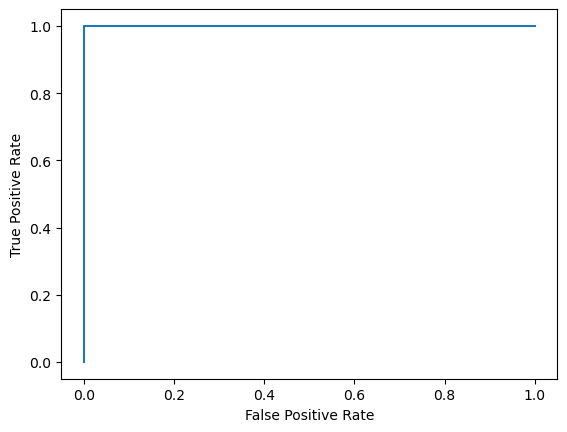

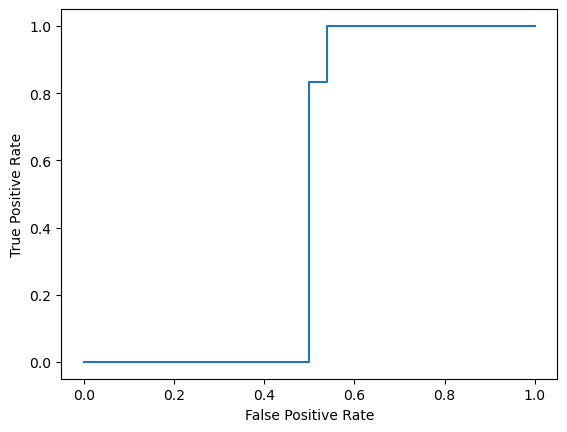

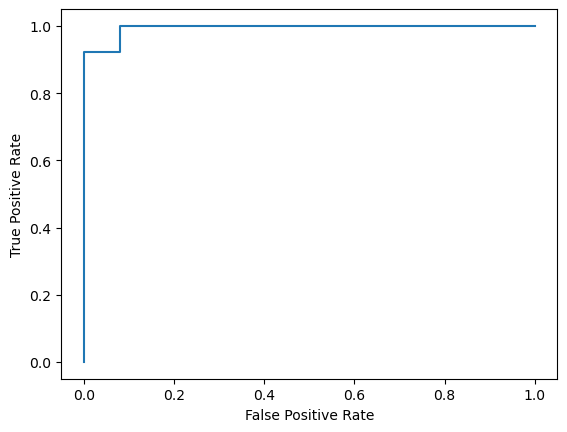

In [32]:
for label in range(3):
    fpr, tpr, thr = metrics.roc_curve(y_test==label, y_proba[:,label])
    print('threshold', label, ': ', thr)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

* print the Logreg coeficients

In [33]:
best_model.coef_

array([[-0.92279364,  1.04444802, -1.55501685, -1.46761734],
       [ 0.19518858, -0.4264684 , -0.07158063, -0.64536485],
       [ 0.72760506, -0.61797963,  1.62659749,  2.11298219]])

* print the Logreg intercepts

In [34]:
best_model.intercept_

array([-0.17366768,  1.66975313, -1.49608545])